              precision    recall  f1-score   support

     Plátano       1.00      1.00      1.00         2
     Naranja       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



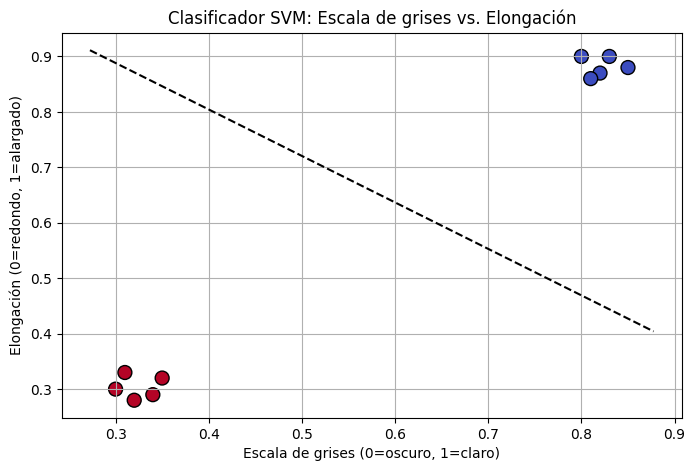

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Datos simulados
# escala de grises (0 = oscuro, 1 = claro)
# elongación (0.3 = redondo, 0.9 = alargado)

# Plátanos (más claros y alargados)
bananas = np.array([
    [0.8, 0.9],
    [0.85, 0.88],
    [0.82, 0.87],
    [0.83, 0.9],
    [0.81, 0.86]
])

# Naranjas (más oscuras y redondas)
oranges = np.array([
    [0.3, 0.3],
    [0.35, 0.32],
    [0.32, 0.28],
    [0.31, 0.33],
    [0.34, 0.29]
])

# Etiquetas: 0 = plátano, 1 = naranja
X = np.vstack((bananas, oranges))
y = np.array([0]*5 + [1]*5)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Modelo SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=['Plátano', 'Naranja']))

# Visualización
def plot_fruits_gray_elong(X, y, clf):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.xlabel('Escala de grises (0=oscuro, 1=claro)')
    plt.ylabel('Elongación (0=redondo, 1=alargado)')

    # Frontera de decisión
    ax = plt.gca()
    xlim = ax.get_xlim()
    xx = np.linspace(xlim[0], xlim[1])
    w = clf.coef_[0]
    b = clf.intercept_[0]
    yy = -(w[0] * xx + b) / w[1]
    plt.plot(xx, yy, 'k--')

    plt.title('Clasificador SVM: Escala de grises vs. Elongación')
    plt.grid(True)
    plt.show()

plot_fruits_gray_elong(X, y, clf)
